In [9]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist, euclidean
from utils import normal_distance_eval
from mpl_toolkits import mplot3d

def rfilter(row):
    return abs(row['X1']) < 6 and abs(row['Y1']) < 6 and abs(row['Z1']) < 6 and abs(row['X2']) < 6 and abs(row['Y2']) < 6 and abs(row['Z2']) < 6 and \
abs(row['X3']) < 6 and abs(row['Y3']) < 6 and abs(row['Z3']) < 6

files = ['ft1cap.csv', 'ft2cap.csv', 'rg1cap.csv', 'rg2cap.csv']
robot_zs = [['Z1', 'Z2'], ['Z2', 'Z3'], ['Z1', 'Z2'],  ['Z2', 'Z3']]
robot_ys = [['Y1', 'Y2'], ['Y2', 'Y3'], ['Y1', 'Y2'],  ['Y2', 'Y3']]
robot_xs = [['X1', 'X2'], ['X2', 'X3'], ['X1', 'X2'],  ['X2', 'X3']]
subject_z = ['Z3', 'Z1', 'Z3', 'Z1']
subject_y = ['Y3', 'Y1', 'Y3', 'Y1']
subject_x = ['X3', 'X1', 'X3', 'X1']

## Leader path

In [42]:
for i, f in enumerate(files):
    plt.clf()
    data = pd.read_csv(files[i], sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)
    data = data[m]
    plt.xlabel('x position [m]')
    plt.ylabel('y position [m]')
    plt.ylim(-1.2, 1.2)
    plt.xlim(-2.2, 2.2)
    plt.plot(data[subject_z[i]], data[subject_x[i]], label='leader', color='g')
    plt.plot(data['robot_z'], data['robot_x'], label='robot', color='navy', linestyle='--')
    plt.legend()
    plt.savefig(f + '.eps', format='eps')
    plt.show()

## Normal distance from path

In [66]:
i = 2
plt.clf()
files = ['ft1cap.csv', 'ft2cap.csv', 'rg1cap.csv', 'rg2cap.csv']
robot_zs = [['Z1', 'Z2'], ['Z2', 'Z3'], ['Z1', 'Z2'],  ['Z2', 'Z3']]
robot_ys = [['Y1', 'Y2'], ['Y2', 'Y3'], ['Y1', 'Y2'],  ['Y2', 'Y3']]
robot_xs = [['X1', 'X2'], ['X2', 'X3'], ['X1', 'X2'],  ['X2', 'X3']]
subject_z = ['Z3', 'Z1', 'Z3', 'Z1']
subject_y = ['Y3', 'Y1', 'Y3', 'Y1']
subject_x = ['X3', 'X1', 'X3', 'X1']

for i, f in enumerate(files):
    if i == 1 or i == 2:
        continue
    data = pd.read_csv(files[i], sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data[subject_z[i]])
    lx = np.array(data[subject_x[i]])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path = normal_distance_eval(robot_coords, leader_coords)
    distance_score = np.trapz(robot_dist_to_leader_path, leader_path_cum_length)
    if f[:2] == 'ft':
        label = 'Follow and Turn'
    else:
        label = 'Rotate and Go'
    plt.plot(leader_path_cum_length, robot_dist_to_leader_path, label = label)
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.5))
    plt.ylim((0, 0.5))
    plt.legend()
    print(f)
    print('Max distance to leader:', np.max(robot_dist_to_leader_path[400:]))
    print('Total distance to leader:', distance_score)

plt.show()
plt.savefig('cap_ft_vs_rg_npd.eps', format='eps')

ft1cap.csv
Max distance to leader: 0.387587546127
Total distance to leader: 1.97606783983
rg2cap.csv
Max distance to leader: 0.373949787914
Total distance to leader: 2.0367190342


## Robot-leader distance

<IPython.core.display.Javascript object>


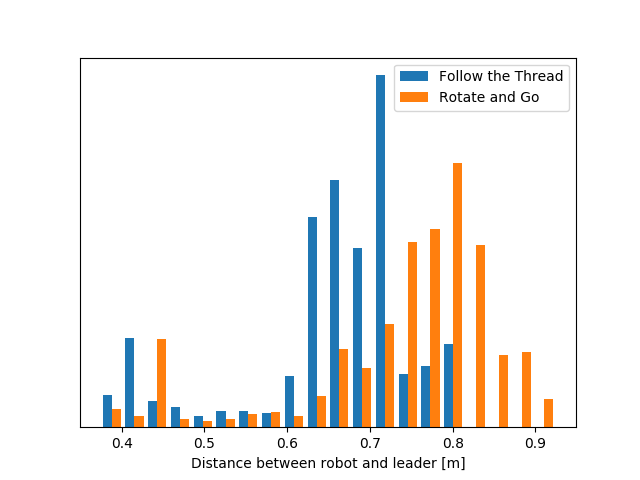

Follow and Turn
0.791579231889
0.0995505436705
0.656141810742
Rotate and Go
0.924594856599
0.118744104117
0.740761001438


In [21]:
plt.clf()
files = ['ft1cap.csv', 'ft2cap.csv', 'rg1cap.csv', 'rg2cap.csv']
robot_zs = [['Z1', 'Z2'], ['Z2', 'Z3'], ['Z1', 'Z2'],  ['Z2', 'Z3']]
robot_ys = [['Y1', 'Y2'], ['Y2', 'Y3'], ['Y1', 'Y2'],  ['Y2', 'Y3']]
robot_xs = [['X1', 'X2'], ['X2', 'X3'], ['X1', 'X2'],  ['X2', 'X3']]
subject_z = ['Z3', 'Z1', 'Z3', 'Z1']
subject_y = ['Y3', 'Y1', 'Y3', 'Y1']
subject_x = ['X3', 'X1', 'X3', 'X1']
plt.clf()
STEP_TIME = 0.01
for i, f in enumerate(files):
    if i == 1 or i == 2:
        continue
    if f[:2] == 'ft':
        label = 'Follow and Turn'
    else:
        label = 'Rotate and Go'
    data = pd.read_csv(files[i], sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)
    data = data[m]
    if i == 0:
        data = data[800:]

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data[subject_z[i]])
    lx = np.array(data[subject_x[i]])
    leader_coords = np.array(list(zip(lz, lx)))
    
    distances = [euclidean(a,b) for a, b in zip(robot_coords, leader_coords)]

    plt.xlim((0, 50))
    plt.ylim((0.3, 1.0))
    plt.ylabel('Distance between robot and leader [m]')
    plt.xlabel('Time [s]')
    plt.plot(np.arange(0.0, STEP_TIME * len(robot_coords), STEP_TIME), distances, label=label)
    plt.legend()
    print(label)
    print(np.max(distances))
    print(np.std(distances))
    print(np.mean(distances))

plt.savefig('cap_ft_vs_rg_dist.eps', format='eps')

In [24]:
plt.clf()
hists = []
for i, f in enumerate(files):
    if i == 1 or i == 2:
        continue
    if f[:2] == 'ft':
        label = 'Follow and Turn'
    else:
        label = 'Rotate and Go'
    data = pd.read_csv(files[i], sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)
    data = data[m]
    if i == 0:
        data = data[800:]

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data[subject_z[i]])
    lx = np.array(data[subject_x[i]])
    leader_coords = np.array(list(zip(lz, lx)))
    
    distances = [euclidean(a,b) for a, b in zip(robot_coords, leader_coords)]
    hists.append(distances)

plt.hist(hists, bins = 20, label=['Follow the Thread', 'Rotate and Go'])
# plt.ylabel('Count')
plt.xlabel('Distance between robot and leader [m]')
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.legend()
plt.savefig('cap_ft_vs_rg_dist_histogram.eps', format='eps')

## 3D plot

In [ ]:
i = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = pd.read_csv(files[i], sep = ';') 
data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
data['robot_y'] = (data[robot_ys[i][0]] + data[robot_ys[i][1]]) / 2
data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
m = data.apply(rfilter, axis=1)
data = data[m]
# plt.xlabel('x position [m]')
# plt.ylabel('y position [m]')
# plt.zlabel('z position [m]')
ax.plot(data[subject_z[i]], data[subject_x[i]], data[subject_y[i]], label='leader', color='g')
ax.set_zlim((0,1))
plt.plot(data['robot_z'], data['robot_x'], data['robot_y'], label='robot', color='navy', linestyle='--')
plt.legend()

## Leader/Robot speed
Calculate and compare the speed of the leader and the robot over time

<IPython.core.display.Javascript object>


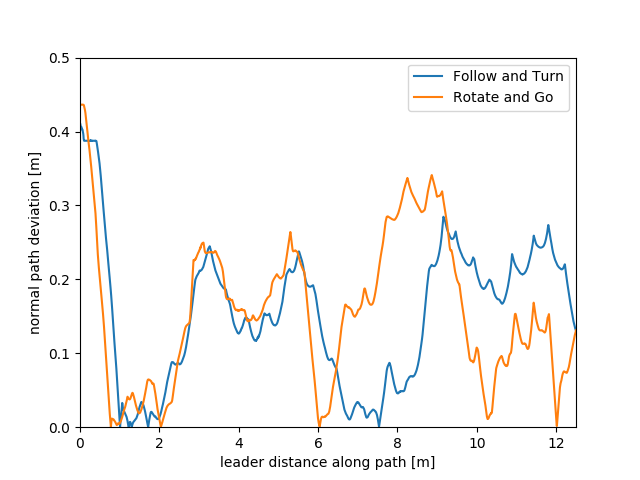

In [48]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

TIME_STEPS = 20
TIME_INTERVAL = 0.01 * TIME_STEPS # seconds
for i, f in enumerate(files):
    plt.clf()
    data = pd.read_csv(f, sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_y'] = (data[robot_ys[i][0]] + data[robot_ys[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)
    data = data[m]

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data[subject_z[i]])
    lx = np.array(data[subject_x[i]])
    leader_coords = np.array(list(zip(lz, lx)))

    vs_robot = []
    vs_leader = []
    for i in np.arange(1, len(leader_coords), TIME_STEPS):
        r_dist = np.linalg.norm(robot_coords[i] - robot_coords[i-1])
        l_dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        vs_robot.append(r_dist/TIME_INTERVAL)
        vs_leader.append(l_dist/TIME_INTERVAL)
        
    vs_leader = smooth(vs_leader, 4)
    # vs_leader[150] = (vs_leader[149] + vs_leader[151]) / 2
    # vs_robot[150] = (vs_robot[149] + vs_robot[151]) / 2

    v_len = len(vs_robot)
    plt.plot(np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL), vs_robot, label='robot')
    plt.plot(np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL), vs_leader, label='leader')
    plt.legend()
    plt.ylim((0, 0.022))
    # plt.xlim((-1, 110))
    plt.xlabel('time [s]')
    plt.ylabel('speed [m/s]')
    plt.savefig(f + '_leader_robot_speed.eps', format='eps')
    plt.show()

In [50]:
robot_dist_to_leader_path

[0.43643845531357567,
 0.43644585601337771,
 0.43644270304617305,
 0.43643836958183457,
 0.43644181009414068,
 0.43643777926670141,
 0.43639789613751573,
 0.43644654065876159,
 0.43644972371654678,
 0.4363928501946383,
 0.43643471234825038,
 0.43644789140543455,
 0.43643865747347588,
 0.43644846578834484,
 0.43643453343456906,
 0.43645323405406217,
 0.43642133411217421,
 0.43643127175879592,
 0.43643722802769697,
 0.43638932262516456,
 0.43643510785682677,
 0.43644031963431151,
 0.43643858770421523,
 0.43643868073218484,
 0.43638954841803901,
 0.43638225536363184,
 0.43643215742569891,
 0.43642519045135325,
 0.43643517037155705,
 0.43643845531357567,
 0.43637367012830869,
 0.43642505082602673,
 0.43644497147779121,
 0.4364304559689321,
 0.43642846812335695,
 0.43643506130923992,
 0.43643624208811987,
 0.43644182610343385,
 0.43643663034311181,
 0.43642750559113475,
 0.43638888207452076,
 0.43644389976376119,
 0.43639291973919558,
 0.4364423306626547,
 0.43644596651389733,
 0.4363926243

In [56]:
robot_dist_to_leader_path[400]

0.014550294163693042